Importo las librerías necesarias

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Defino el dataframe

In [7]:
spotifyDf=pd.read_csv("/train.csv",delimiter=",")
print(spotifyDf.head(50).to_markdown())


|    |   Unnamed: 0 | track_id               | artists                              | album_name                                              | track_name                                                |   popularity |   duration_ms | explicit   |   danceability |   energy |   key |   loudness |   mode |   speechiness |   acousticness |   instrumentalness |   liveness |   valence |   tempo |   time_signature | track_genre   |
|---:|-------------:|:-----------------------|:-------------------------------------|:--------------------------------------------------------|:----------------------------------------------------------|-------------:|--------------:|:-----------|---------------:|---------:|------:|-----------:|-------:|--------------:|---------------:|-------------------:|-----------:|----------:|--------:|-----------------:|:--------------|
|  0 |            0 | 5SuOikwiRyPMVoIQDJUgSV | Gen Hoshino                          | Comedy                                                

Cuales son las canciones mas populares


In [8]:
dfMasPopulares = spotifyDf.sort_values(by='popularity', ascending=False)
print(dfMasPopulares.head(30).to_markdown())

|       |   Unnamed: 0 | track_id               | artists                    | album_name                                                          | track_name                            |   popularity |   duration_ms | explicit   |   danceability |   energy |   key |   loudness |   mode |   speechiness |   acousticness |   instrumentalness |   liveness |   valence |   tempo |   time_signature | track_genre   |
|------:|-------------:|:-----------------------|:---------------------------|:--------------------------------------------------------------------|:--------------------------------------|-------------:|--------------:|:-----------|---------------:|---------:|------:|-----------:|-------:|--------------:|---------------:|-------------------:|-----------:|----------:|--------:|-----------------:|:--------------|
| 81051 |        81051 | 3nqQXoyQOWXiESFLlDF1hG | Sam Smith;Kim Petras       | Unholy (feat. Kim Petras)                                           | Unholy (feat. Kim Pet

defino un data set que agrupe por genero y muestre el recuento de las mismas
calcular la popularidad de cada género de manera relativa, puedes contar el número de canciones por género y utilizar esa información para representar la popularidad en un gráfico.

In [16]:
df_generos = spotifyDf['track_genre'].value_counts().reset_index()
df_generos.columns = ['Genero', 'Numero_de_canciones']
print(df_generos)

           Genero  Numero_de_canciones
0        acoustic                 1000
1        afrobeat                 1000
2        mandopop                 1000
3           malay                 1000
4          latino                 1000
..            ...                  ...
91        dubstep                 1000
92            dub                 1000
93  drum-and-bass                 1000
94         disney                 1000
95          salsa                  431

[96 rows x 2 columns]


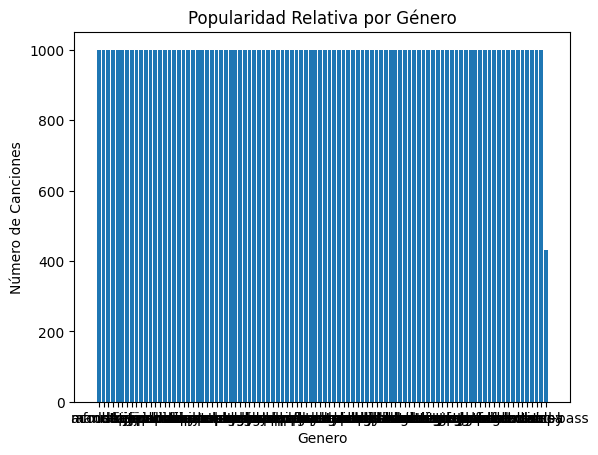

In [17]:
plt.bar(df_generos['Genero'], df_generos['Numero_de_canciones'])
plt.xlabel('Genero')
plt.ylabel('Número de Canciones')
plt.title('Popularidad Relativa por Género')
plt.show()

Muestra da la valoracion de canciones por genero:


In [18]:
print(spotifyDf.columns)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [28]:
# Agrupa por género y calcula la media de las valoraciones para cada género
df_valoraciones = spotifyDf.groupby('track_genre')['popularity'].mean().reset_index()

# Ordena el DataFrame por la media de valoraciones en orden descendente
df_valoraciones = df_valoraciones.sort_values(by='popularity', ascending=False)

print(df_valoraciones)

       track_genre  popularity
81        pop-film      59.283
65           k-pop      56.896
15           chill      53.651
94             sad      52.379
44          grunge      49.594
..             ...         ...
13   chicago-house      12.339
24  detroit-techno      11.174
67           latin       8.297
93         romance       3.245
59         iranian       2.210

[96 rows x 2 columns]


los 20 generos mejor valorados

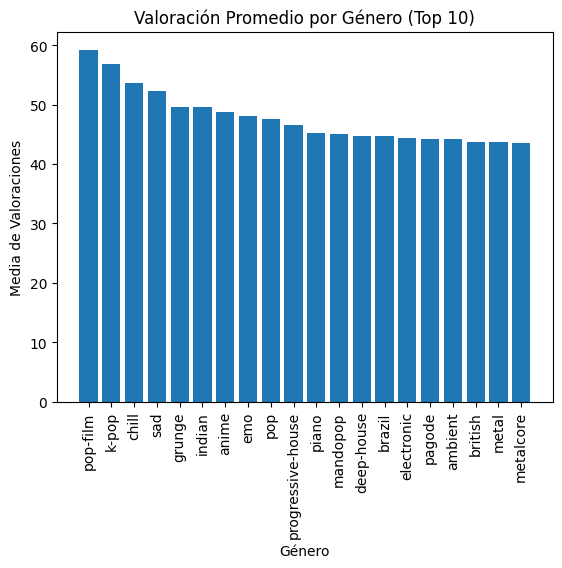

In [26]:
df_valoraciones_top10 = df_valoraciones.head(20)

plt.bar(df_valoraciones_top10['track_genre'], df_valoraciones_top10['popularity'])
plt.xlabel('Género')
plt.ylabel('Media de Valoraciones')
plt.title('Valoración Promedio por Género (Top 20)')
plt.xticks(rotation=90)
plt.show()


Los 20 generos peor valorados

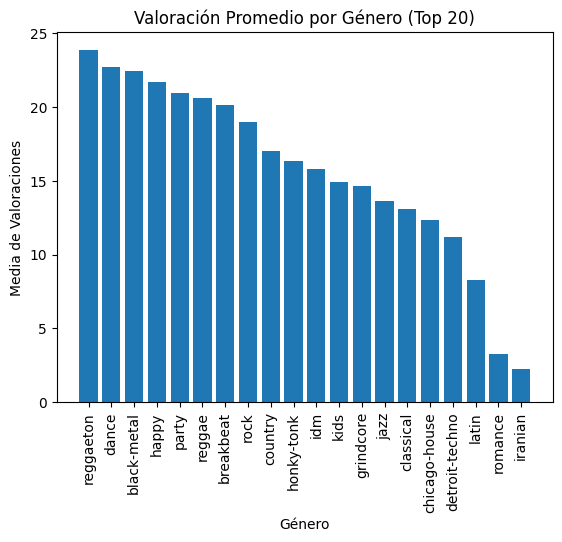

In [29]:
df_valoraciones_top10 = df_valoraciones.tail(20)

plt.bar(df_valoraciones_top10['track_genre'], df_valoraciones_top10['popularity'])
plt.xlabel('Género')
plt.ylabel('Media de Valoraciones')
plt.title('Valoración Promedio por Género (Top 20)')
plt.xticks(rotation=90)
plt.show()

las 20 canciones mejor valoradas

In [32]:
df_top20 = spotifyDf.sort_values(by='popularity', ascending=False).head(20)
print(df_top20.to_markdown())


|       |   Unnamed: 0 | track_id               | artists                    | album_name                            | track_name                            |   popularity |   duration_ms | explicit   |   danceability |   energy |   key |   loudness |   mode |   speechiness |   acousticness |   instrumentalness |   liveness |   valence |   tempo |   time_signature | track_genre   |
|------:|-------------:|:-----------------------|:---------------------------|:--------------------------------------|:--------------------------------------|-------------:|--------------:|:-----------|---------------:|---------:|------:|-----------:|-------:|--------------:|---------------:|-------------------:|-----------:|----------:|--------:|-----------------:|:--------------|
| 81051 |        81051 | 3nqQXoyQOWXiESFLlDF1hG | Sam Smith;Kim Petras       | Unholy (feat. Kim Petras)             | Unholy (feat. Kim Petras)             |          100 |        156943 | False      |          0.714 |    0.472 |

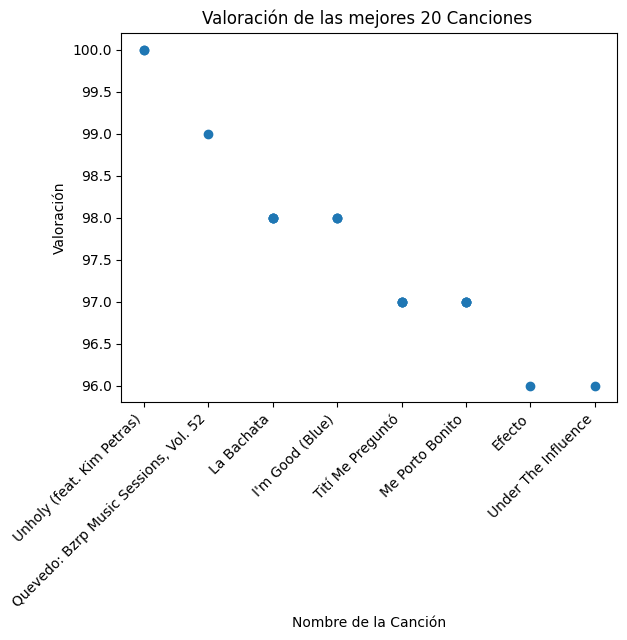

In [34]:
plt.scatter(df_top20['track_name'], df_top20['popularity'])
plt.xlabel('Nombre de la Canción')
plt.ylabel('Valoración')
plt.title('Valoración de las mejores 20 Canciones ')
plt.xticks(rotation=45, ha="right")  # Ajusta el ángulo de rotación según tus preferencias
plt.show()

Las 20 peor valoradas:

In [36]:
df_lesstop20 = spotifyDf.sort_values(by='popularity', ascending=False).tail(20)
print(df_top20.to_markdown())

|       |   Unnamed: 0 | track_id               | artists                                                                                                                                      | album_name                                   | track_name                             |   popularity |   duration_ms | explicit   |   danceability |   energy |   key |   loudness |   mode |   speechiness |   acousticness |   instrumentalness |   liveness |   valence |   tempo |   time_signature | track_genre   |
|------:|-------------:|:-----------------------|:---------------------------------------------------------------------------------------------------------------------------------------------|:---------------------------------------------|:---------------------------------------|-------------:|--------------:|:-----------|---------------:|---------:|------:|-----------:|-------:|--------------:|---------------:|-------------------:|-----------:|----------:|--------:|-----------------:|:--

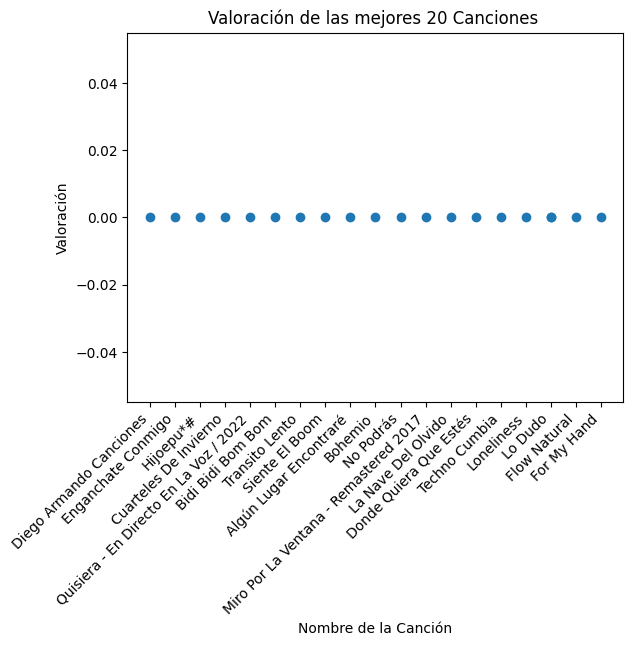

In [37]:
plt.scatter(df_lesstop20['track_name'], df_lesstop20['popularity'])
plt.xlabel('Nombre de la Canción')
plt.ylabel('Valoración')
plt.title('Valoración de las mejores 20 Canciones ')
plt.xticks(rotation=45, ha="right")  # Ajusta el ángulo de rotación según tus preferencias
plt.show()